In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys

file_path = "https://raw.githubusercontent.com/FarzinSohraby/PathInHydro/refs/heads/main/"

%matplotlib inline

In [2]:
# Define the categories
bin_cate = ['Primary', 'Secondary']

# Define the color palette (Primary: Blue, Secondary: Red)
bin_palette = sns.color_palette(["#1F449C", "#F05039"])
bin_colors = {'Primary': bin_palette[0], 'Secondary': bin_palette[1]}

# Set up the plotting environment
sns.set_style("ticks")
plt.rcParams.update({'font.size': 18})  # Update the font size globally

In [3]:
data = pd.read_csv(file_path+'Df_H2ase_CO_H2.csv')

# Add a 'Molecule' column to distinguish CO and H2 based on the 'Trajectory' column
data['Molecule'] = data['Trajectory'].apply(lambda x: 'H2' if 'H2' in x else 'CO')


data = data.drop(["Trajectory", "Frame", "Binary"], axis=1)

X = data.drop(['Pathway-new', "Molecule"], axis=1)  # Features
y = data['Pathway-new']  # Target variable

# Perform stratified train/validation/test split based on 'Molecule' column to ensure the 75/15/15% distribution for CO and H2
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=data['Molecule'])

# Now split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1, stratify=data.loc[y_temp.index, 'Molecule'])

# Load and preprocess the O2 dataset
data_O2 = pd.read_csv(file_path+'Df_H2ase_O2.csv')
y_O2 = data_O2['Pathway-new']

# Load and preprocess the Mdg_CO dataset
data_Mdg_CO = pd.read_csv(file_path+'Mdg_H2ase_CO.csv')
y_Mdg_CO = data_Mdg_CO['Pathway-new']

# Load and preprocess the Mdg_H2 dataset
data_Mdg_H2 = pd.read_csv(file_path+'Mdg_H2ase_H2.csv')
y_Mdg_H2 = data_Mdg_H2['Pathway-new']

# Load and preprocess the Mdg_O2 dataset
data_Mdg_O2 = pd.read_csv(file_path+'Mdg_H2ase_O2.csv')
y_Mdg_O2 = data_Mdg_O2['Pathway-new']

In [4]:
# convert the multiclass labels to binary labels
def multiclass_to_binary(labels):
    bin_labels = ['Primary' if t in ['T1', 'T2', 'T7'] else 'Secondary' for t in labels.to_list()]
    bin_labels = pd.Series(bin_labels, index=labels.index, name='Binary')
    return bin_labels

[bin_train, bin_val, bin_test, bin_O2, bin_Mdg_CO, bin_Mdg_H2, bin_Mdg_O2] = [multiclass_to_binary(labels) for labels in [y_train, y_val, y_test, y_O2, y_Mdg_CO, y_Mdg_H2, y_Mdg_O2]]

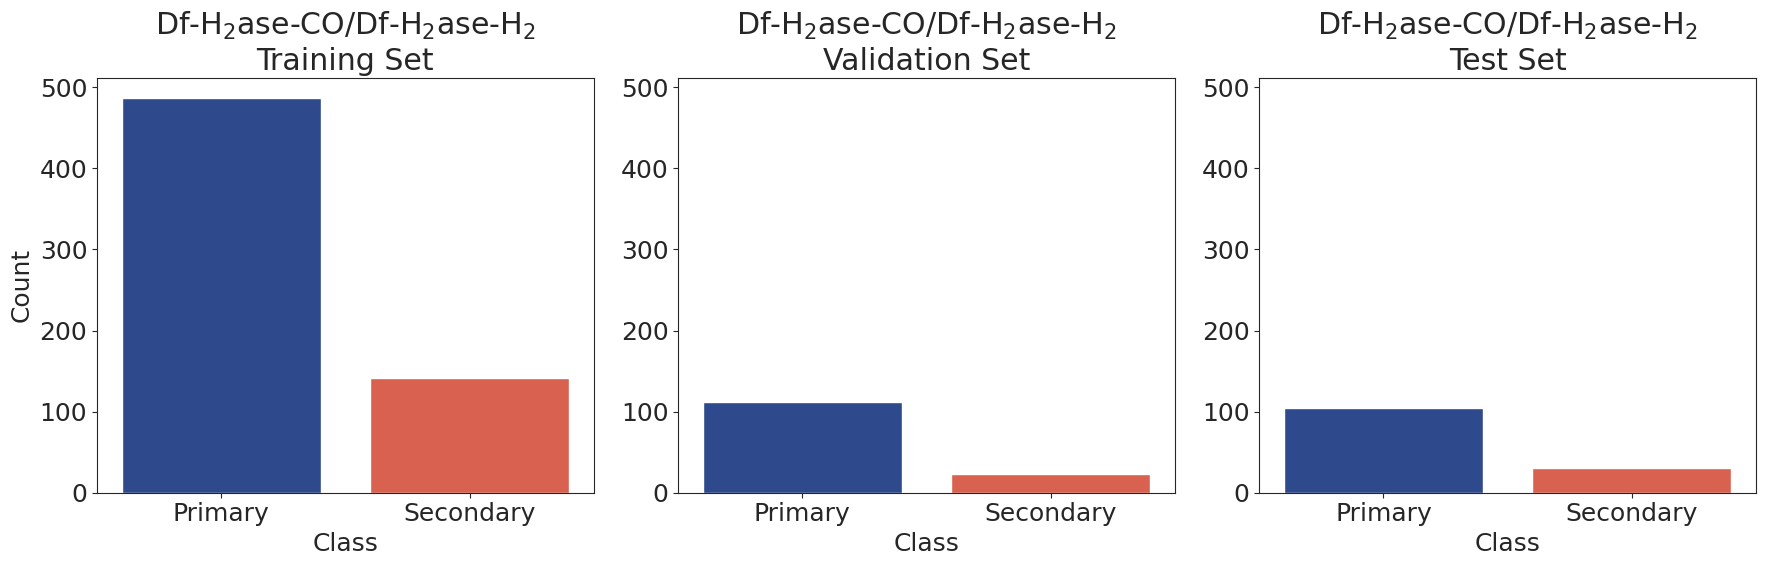

In [5]:
fig_bin_DfCO, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))

sns.countplot(x=bin_train, hue=bin_train, order=bin_cate, palette=bin_colors, legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-CO/Df-H$_2$ase-H$_2$\nTraining Set')

sns.countplot(x=bin_val, hue=bin_val, order=bin_cate, palette=bin_colors, legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-CO/Df-H$_2$ase-H$_2$\nValidation Set')

sns.countplot(x=bin_test, hue=bin_test, order=bin_cate, palette=bin_colors, legend=False, ax=axes[2])
axes[2].set_title('Df-H$_2$ase-CO/Df-H$_2$ase-H$_2$\nTest Set')

for i in range(3):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
#plt.savefig(file_path+'Distribution_Binary_Df_H2se_CO-H2.png', dpi=300, bbox_inches='tight')
plt.show()


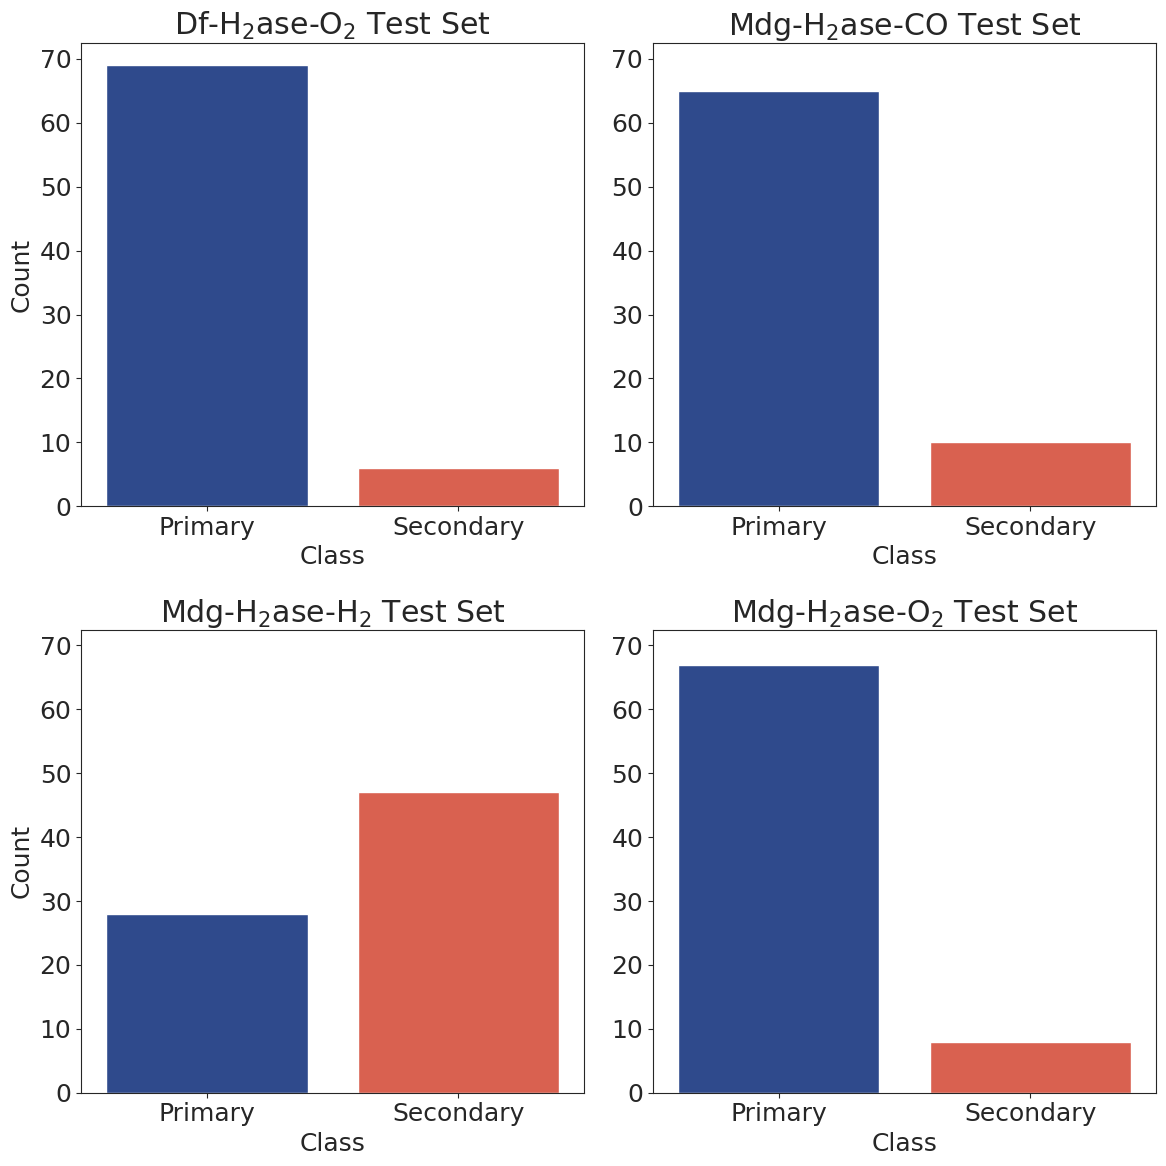

In [ ]:
fig_mc_other, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(12,12))

# Plotting for Df-H2ase-O2
sns.countplot(x=bin_O2, hue=bin_O2, order=bin_cate, palette=bin_colors, legend=False, ax=axes[0, 1])
axes[0, 0].set_title('Df-H$_2$ase-O$_2$ Test Set')

# Plotting for Mdg-H2ase-CO
sns.countplot(x=bin_Mdg_CO, hue=bin_Mdg_CO, order=bin_cate, palette=bin_colors, legend=False, ax=axes[0, 0])
axes[0, 1].set_title('Mdg-H$_2$ase-CO Test Set')

# Plotting for Mdg-H2ase-H2
sns.countplot(x=bin_Mdg_H2, hue=bin_Mdg_H2, order=bin_cate, palette=bin_colors, legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Mdg-H$_2$ase-H$_2$ Test Set')

# Plotting for Mdg-H2ase-O2
sns.countplot(x=bin_Mdg_O2, hue=bin_Mdg_O2, order=bin_cate, palette=bin_colors, legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Mdg-H$_2$ase-O$_2$ Test Set')


# Iterate through the subplots correctly
for i in range(2):
    for j in range(2):
        axes[i, j].set_xlabel('Class')
        axes[i, j].set_ylabel('Count')
        axes[i, j].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
#plt.savefig(file_path+'Distribution_Binary_DF_test_sets.png', dpi=300, bbox_inches='tight')
plt.show()

       Class  Df-H2ase-CO/H2 train  Df-H2ase-CO/H2 validation  \
0    Primary                   487                        112   
1  Secondary                   142                         23   

   Df-H2ase-CO/H2 test  Df-H2ase-O2  Mdg-H2ase-CO  Mdg-H2ase-H2  Mdg-H2ase-O2  
0                  104           65            69            28            67  
1                   31           10             6            47             8  


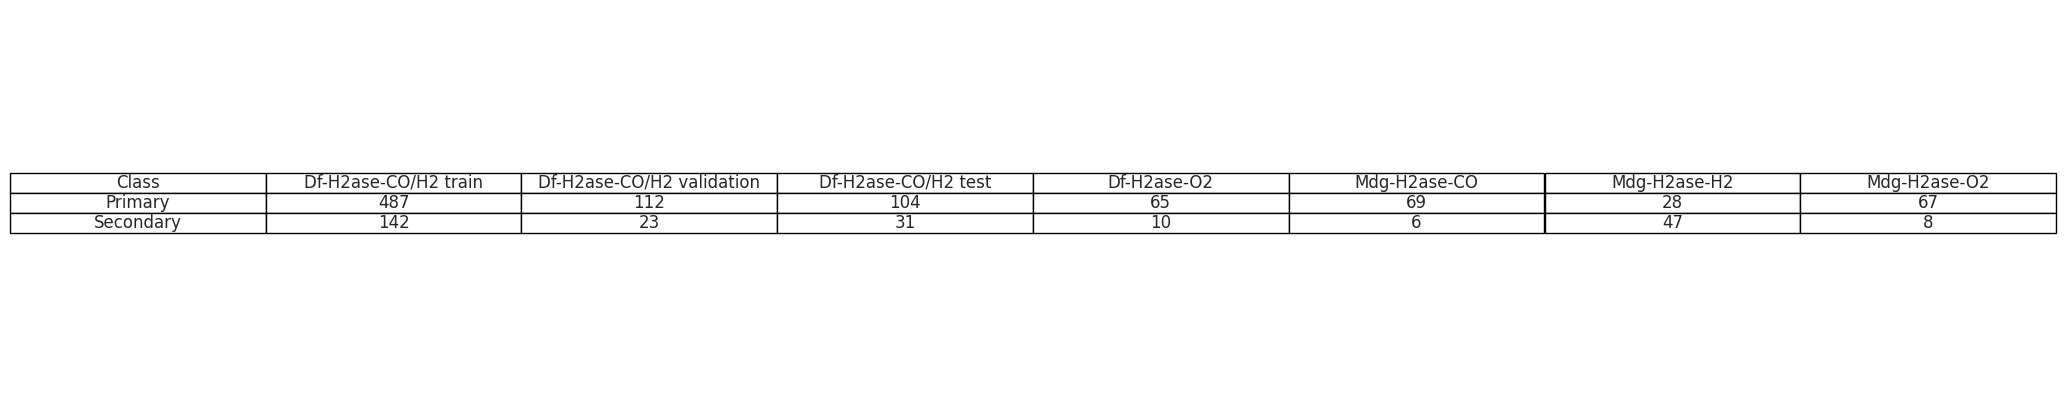

In [ ]:
# Calculate the class distributions
#dist_H2_bin = bin_H2.value_counts().sort_index()
dist_O2_bin = bin_O2.value_counts().sort_index()
dist_Mdg_CO_bin = bin_Mdg_CO.value_counts().sort_index()
dist_Mdg_H2_bin = bin_Mdg_H2.value_counts().sort_index()
dist_Mdg_O2_bin = bin_Mdg_O2.value_counts().sort_index()
dist_train_bin = bin_train.value_counts().sort_index()
dist_val_bin = bin_val.value_counts().sort_index()
dist_test_bin = bin_test.value_counts().sort_index()

# Combine these distributions into a single DataFrame
bin_distribution_df = pd.DataFrame({
    'Class': bin_cate,
    'Df-H2ase-CO/H2 train': dist_train_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-CO/H2 validation': dist_val_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-CO/H2 test': dist_test_bin.reindex(bin_cate, fill_value=0),
    #'Df-H2ase-H2': dist_H2_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-O2': dist_O2_bin.reindex(bin_cate, fill_value=0),
    'Mdg-H2ase-CO': dist_Mdg_CO_bin.reindex(bin_cate, fill_value=0),
    'Mdg-H2ase-H2': dist_Mdg_H2_bin.reindex(bin_cate, fill_value=0),
    'Mdg-H2ase-O2': dist_Mdg_O2_bin.reindex(bin_cate, fill_value=0),
}).reset_index(drop=True)

# Display the DataFrame as a table
print(bin_distribution_df)

# If you want to display the table as an image
plt.figure(figsize=(22, 5))
plt.axis('off')
table = plt.table(cellText=bin_distribution_df.values, colLabels=bin_distribution_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

